# LINEAR REGRESSION PROJECT 

The data contains various information about the weather, so the task is to predict the maximum temperature taking input feature as minimum tem perature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
df.shape

(366, 22)

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [5]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [6]:
df[['Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am']].fillna(0)

,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am
0,6.3,NW,30.0,SW,NW,6.0
1,9.7,ENE,39.0,E,W,4.0
2,3.3,NW,85.0,N,NNE,6.0
3,9.1,NW,54.0,WNW,W,30.0
4,10.6,SSE,50.0,SSE,ESE,20.0
...,...,...,...,...,...,...
361,12.1,NNW,76.0,SSE,NW,7.0
362,12.7,N,48.0,NNW,NNW,2.0
363,5.3,ESE,43.0,ENE,ENE,11.0
364,7.1,NW,46.0,SSW,WNW,6.0


## univariate analysis 

In [7]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

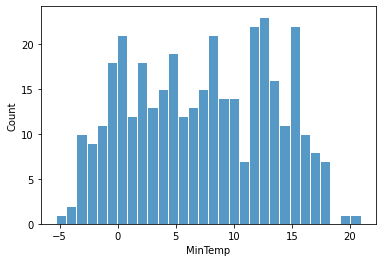

In [8]:
sns.histplot(df.MinTemp, edgecolor='w', bins=30)

The minTem is somehow envenly distributed.
The temperature seems to be fluctuating by increasing and descreasing in respect to the weather condition.

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

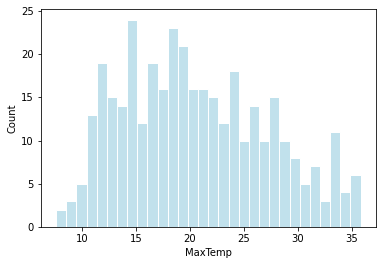

In [9]:
sns.histplot(df.MaxTemp, color='lightblue', edgecolor='w', bins=30)

The MaxTem to be fluctuating as well pending on the whether condition. 

# Bivariat analysis

C:\Users\petergg4me\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


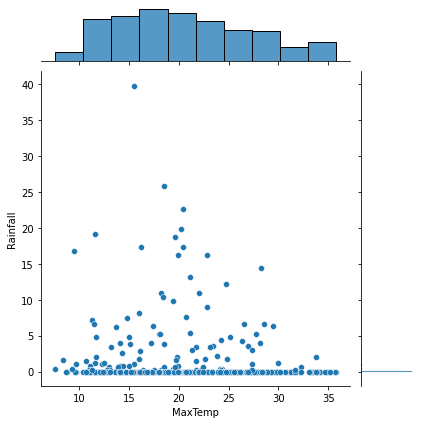

In [10]:
sns.jointplot(df.MaxTemp, df.Rainfall, kind='scatter')

the chart shows the probality of rainfall at MaxTemp is very low.
The rainfall base on the whether condition in respect to tempterature. the Point are scattered indicating no specification for the rainfall due to the fluctuation of the whether condition. And even if the rain will fall it wont be that serious

C:\Users\petergg4me\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


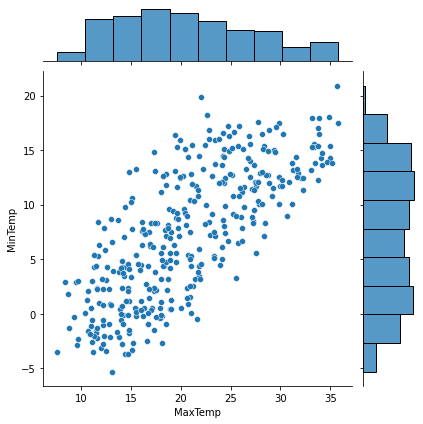

In [11]:
sns.jointplot(df.MaxTemp, df.MinTemp, kind='scatter')

The relationship between MinTemp and MaxTemp is Linear

## Mutivibrate analysis

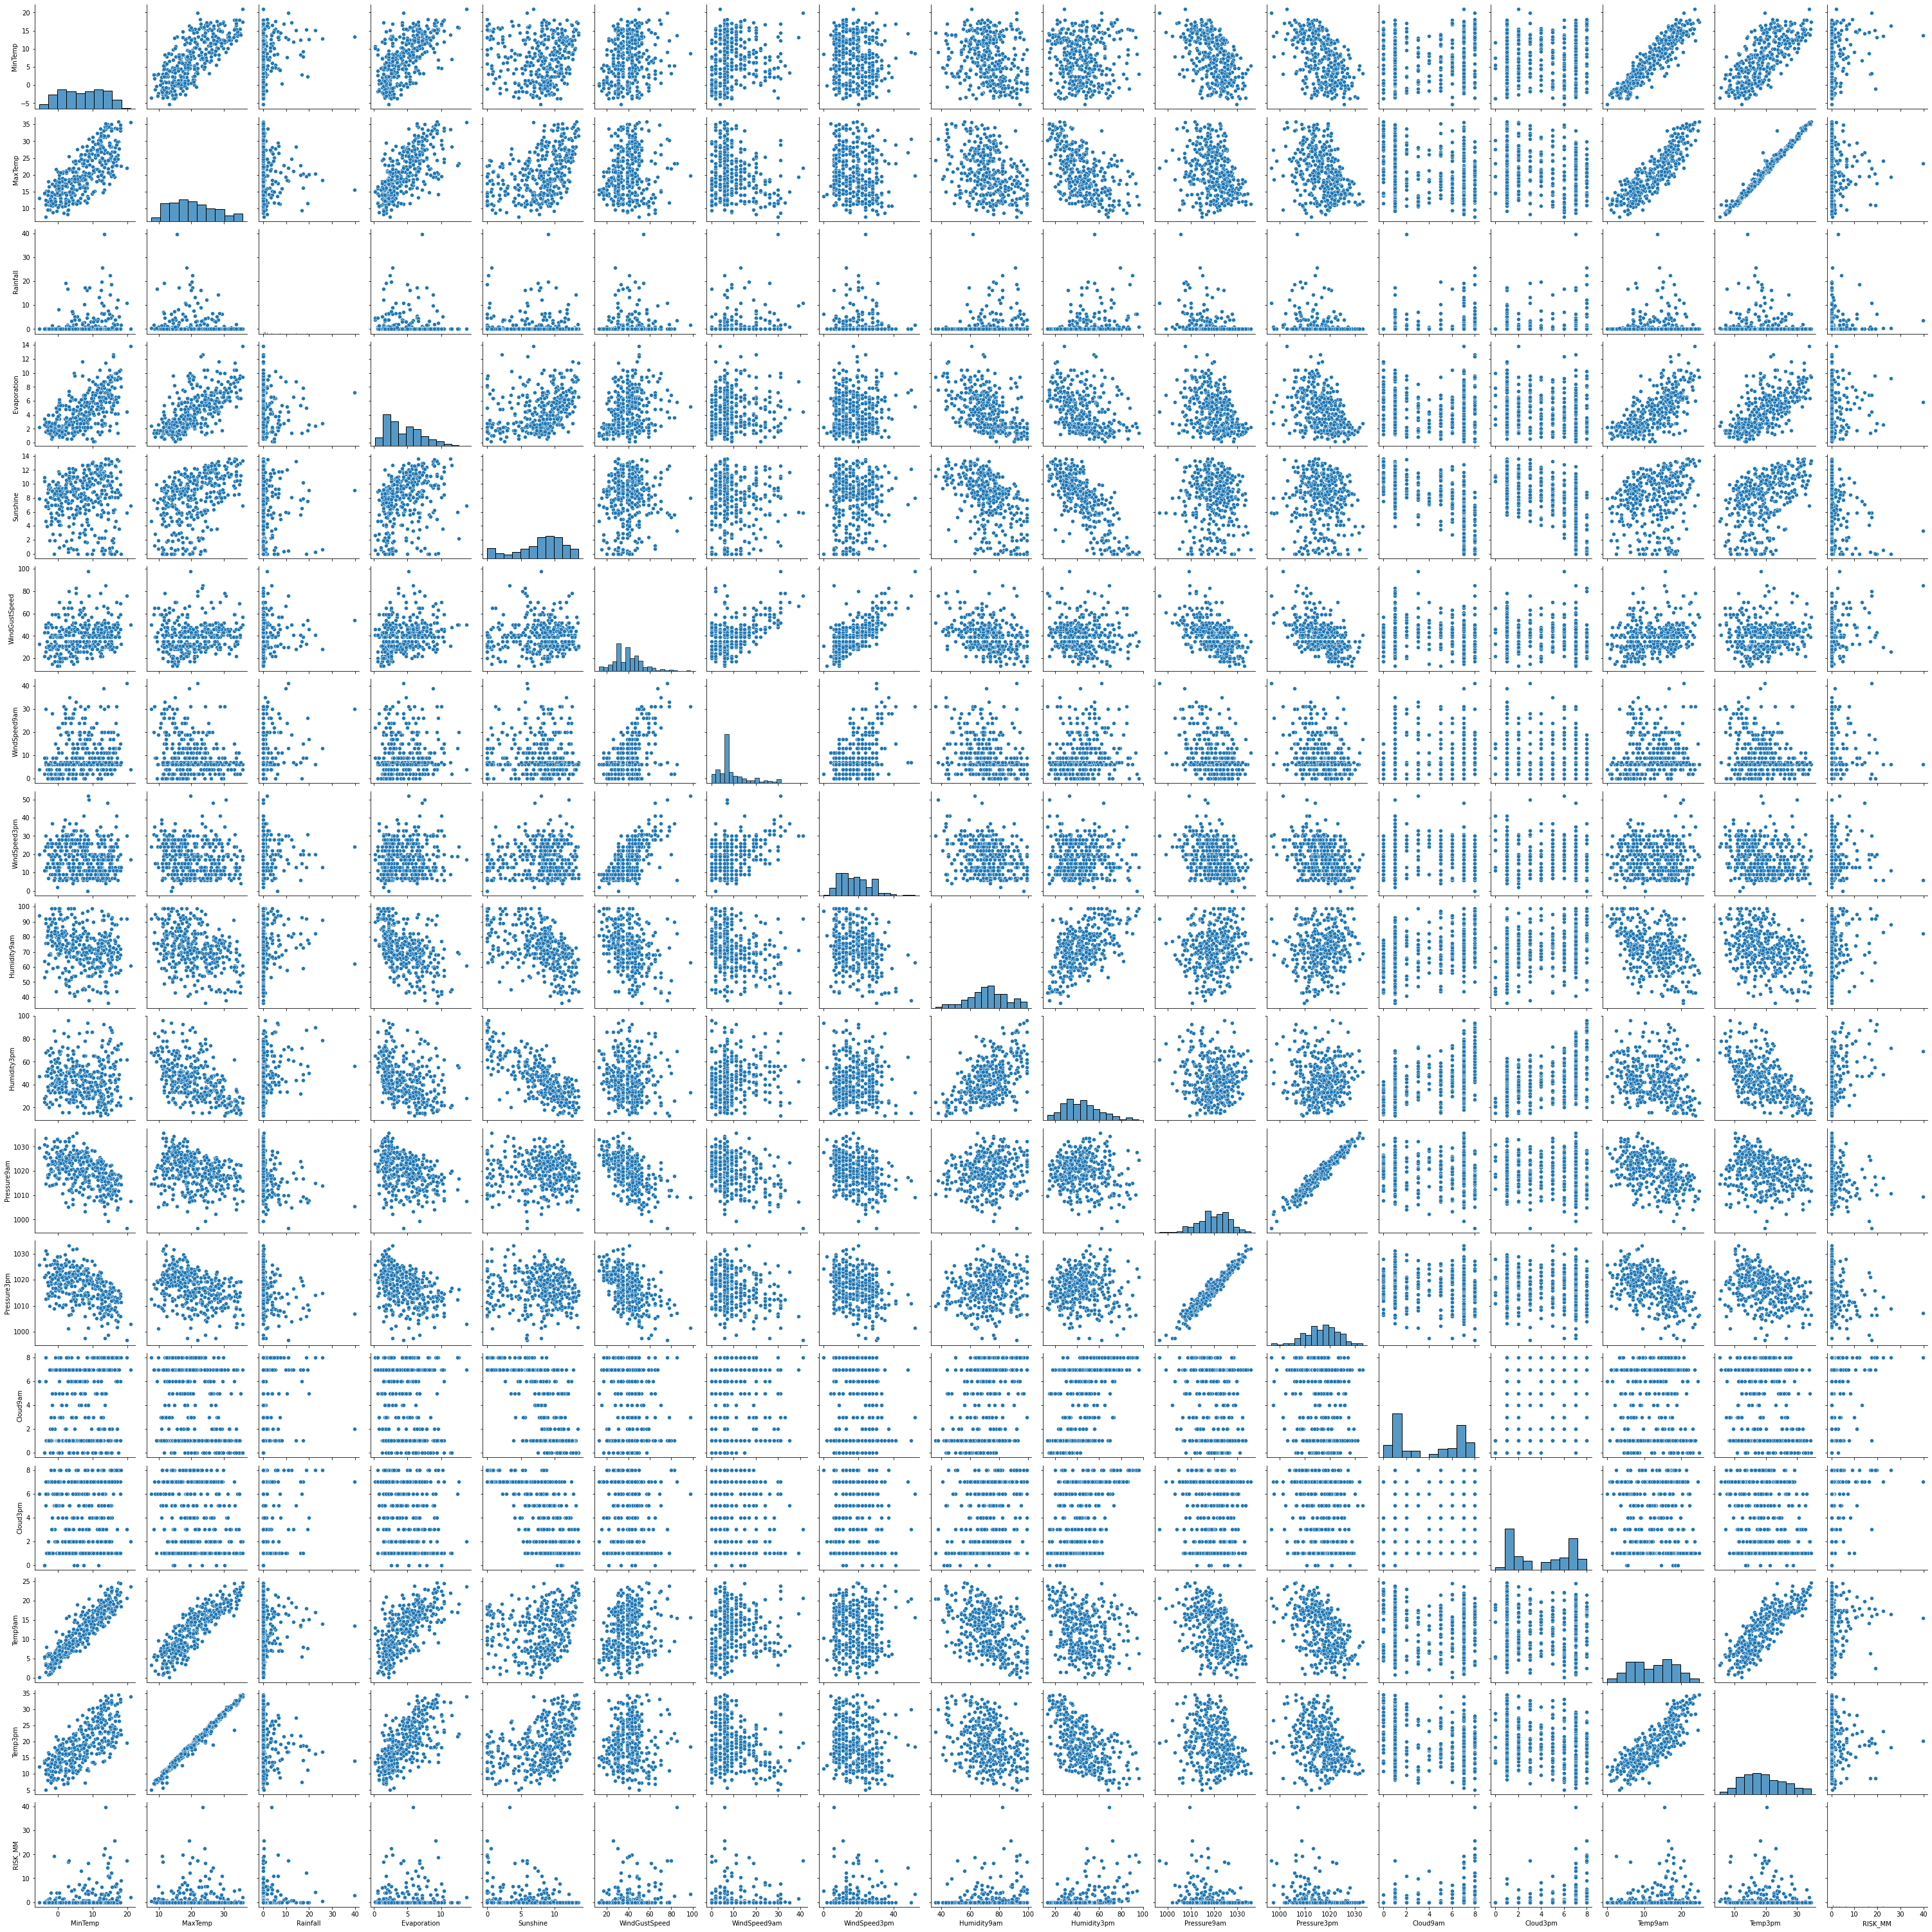

In [12]:
sns.pairplot(df)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
x=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [16]:
reg=LinearRegression()

In [17]:
reg.fit(x_train, y_train)

LinearRegression()

In [18]:
print(reg.intercept_)
print(reg.coef_)

[14.56202411]
[[0.81953755]]


In [22]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [26]:
y_pred=reg.predict(x_test)
y_pred

array([[23.41302965],
       [13.08685652],
       [27.26485614],
       [25.46187353],
       [26.93704112],
       [20.0529257 ],
       [29.31370001],
       [13.82444032],
       [17.43040554],
       [19.56120317],
       [20.87246325],
       [25.21601226],
       [16.44696048],
       [16.44696048],
       [13.33271779],
       [16.36500672],
       [16.52891423],
       [22.01981582],
       [20.62660198],
       [23.98670594],
       [24.06865969],
       [18.08603558],
       [27.18290238],
       [14.56202411],
       [14.3981166 ],
       [12.43122648],
       [28.08439369],
       [26.36336483],
       [24.970151  ],
       [15.79133044],
       [22.83935337],
       [21.85590831],
       [24.72428973],
       [28.08439369],
       [23.82279843],
       [19.64315692],
       [25.8716423 ],
       [25.46187353],
       [12.7590415 ],
       [28.2483012 ],
       [14.31616285],
       [14.97179289],
       [13.82444032],
       [15.62742293],
       [27.10094863],
       [17

In [28]:
score=r2_score(y_pred,y_test)
score

0.3412513475136043

In [29]:
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)

In [30]:
print(mae)
print(mse)
print(rmse)
print(score)

3.5094353112899594
17.011877668640622
4.124545753006096
0.3412513475136043


In [20]:
df2=pd.DataFrame({'Actual': y_test.flatten(), 'predicted MaxTemp': y_pred.flatten()})
df2


,Actual,predicted MaxTemp
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151
